<a href="https://colab.research.google.com/github/mickeykubo/analytics_book/blob/master/pandas1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python言語によるビジネスアナリティクス
## 実務家のための最適化，統計分析，機械学習（近代科学社）

##  Pandas

Pandasの機能は豊富すぎて網羅するとわかりにくくなる．ここではデータ解析でよく使うテクニックだけを紹介する．

まずpandasモジュール（パッケージ）をインポートする．慣例に従い *pd* という別名をつけておく．

In [0]:
import pandas as pd

# データ読み込み

次に，データを読む．urlを直接入れてWeb経由でも読むことができる．

ここでは UCI機械学習レポジトリ https://archive.ics.uci.edu/ml/ からiris（あやめ）のデータを直接読んでみる．

ブラウザでurl http://logopt.com/data/iris.data/ をみてデータを確認すると，列の名前（ヘッダー）がついておらずデータだけが**カンマ区切り**で並んでいるようだ．

これはcsv (comma-separated valueの略）ファイルと呼ばれるタイプのテキストファイルなので，**read_csv関数**で読むことができる．返値はデータを表形式で保管するデータ構造であるデータフレームである．（ここでは *df* という名前の変数に保管しておく．）

ついでに列名をnames引数で指定してあげよう．これは列名を表す文字列のリストとして与える．教科書「 Python言語によるビジネスアナリティクスの84ページに書いてあるように，データは順に「'がく片長','がく片幅','花びら長','花びら幅', '種類'」である．


In [0]:
df = pd.read_csv('http://logopt.com/data/iris.data', names=['がく片長','がく片幅','花びら長','花びら幅', '種類'])

In [0]:
df.head() # headメソッドで最初の5つだけを表示（最後を表示するにはtailを使う；やってみよう！）

,がく片長,がく片幅,花びら長,花びら幅,種類
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


もう１つの例題としてUFOの目撃情報のデータを読み込んでみよう。データはhttp://logopt.com/data/ufo.csv にある。

このデータはヘッダーが付いているので、**names**で列名を指定せずに読み込むことができる。ただし、最初の列が抜けているので、Unnamed:0 と表示される。

In [0]:
ufo = pd.read_csv('http://logopt.com/data/ufo.csv')
ufo.head()

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
0,0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### 問題

ワインに関するデータセットから，wineデータを読み込んで，wineという名前でデータフレームに保管せよ．

元データはこちらに格納されている．

http://logopt.com/data/wine.data

列名は https://archive.ics.uci.edu/ml/datasets/Wine で解説されているが，必要ならば以下のリストを用いて，列名を設定して読み込め．

``` python 
L = [ 'Alcohol', 'Malic','Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid', 'Proanthocyanins', 'Color', 'Hue', 'OD280', 'OD315', 'Proline']  
```

さらに，最後の5つのデータを表示させて確認せよ．

In [0]:
L = [ 'Alcohol', 'Malic','Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoid', 'Proanthocyanins', 'Color', 'Hue', 'OD280', 'OD315', 'Proline']  

### 問題

ビデオゲームのセールスデータを http://logopt.com/data/vgsales.csv から読みこみ、データフレームに保管せよ。ただし、このデータにはヘッダーが付いている。

### 問題

車の燃費に関するデータセットから，Auto MPGデータを読み込んで，carという名前でデータフレームに保管せよ．

元データはこちらに格納されている．

http://logopt.com/data/auto-mpg.data

データを確認してみると，このデータはカンマ(,)区切り（これがread_csv関数の規定値）ではなく，空白で区切られている．

このような場合には，read_csvの引数の delim_whitespace をTrueに設定しておく必要がある．

列名は https://archive.ics.uci.edu/ml/datasets/Auto+MPG で解説されているが，必要ならば以下のリストを用いて，列名を設定して読み込め．

``` python 
L = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name'] 
```

さらに，最初と最後の5つのデータを表示させて確認せよ．

In [0]:
L = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name'] 

# データフレームの属性

pandasのデータフレームは，Excelの表のようなものなので，行と列でアクセスできる．

行に付加されたラベルを**インデックス(index)**とよぶ．一番左端 $0,1,2,3.\ldots$ と表示されている太字の列がインデックスである．
これは**index属性**でアクセスできる．

In [0]:
df = pd.read_csv('http://logopt.com/data/iris.data', names=['がく片長','がく片幅','花びら長','花びら幅', '種類'])
print(df.index) #インデックスは0から149までの整数であることが表示される． 
df.head()

RangeIndex(start=0, stop=150, step=1)


,がく片長,がく片幅,花びら長,花びら幅,種類
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


インデックスとなる列をしていないと、上のように0から始める整数が自動的に付加される。インデックス列を指定するには、**read_csv**を用いてデータを読み込む際に、**index_col**引数で指定することができる。列の番号もしくは列名を与えることによって、指定した列がインデックスになる。

UFOの目撃情報のデータで最初の列（0番目の列）をインデックスとして指定して読み込んでみる。

In [0]:
ufo = pd.read_csv('http://logopt.com/data/ufo.csv', index_col = 0)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


列の名前は，番上に表示されている太字の行であり，これは**columns属性**でアクセスできる．

In [0]:
df.columns

Index(['がく片長', 'がく片幅', '花びら長', '花びら幅', '種類'], dtype='object')

データ自身は，データフレームの**values属性**に保管されている．これはNumPyの多次元配列(ndarray)である(type関数を用いて確認してみる）．
したがって，データの最初の行を表示させるには，df.values[0]とすればよい．
0行4列目（最初のアヤメの名前）を表示させるには，df.values[0][4]とすればよい．

In [0]:
print( type(df.values) ) #values属性はNumPyのn次元配列である．
df.values[0][4] #0行4列目の要素は 'Iris-sentosa'である．

<class 'numpy.ndarray'>


'Iris-setosa'

データの概要を知るためのメソッドが**describe()**である．（メソッドなので関数と同じように最後に ()を付けるのを忘れずに．）

In [0]:
df.describe() #count（データ数），mean（平均），std（標準偏差），min（最小値）など

,がく片長,がく片幅,花びら長,花びら幅
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 問題

車の燃費データに対して，アヤメのデータと同じように，インデックス，列の名前とデータの概要を表示せよ．

さらに，その情報を用いて燃費(MPG: Mile Per Gallon)の平均と標準偏差を答えよ．


# 列へのアクセス

列は辞書と同じようにアクセスできる．

たとえば，'がく片幅'と名付けられた列を切り出すには，**df['がく片幅']** とすればよい．

この記法の短縮版として，データフレームの属性としてアクセスする方法もある．

たとえば，

``` python
 df.がく片幅
```

とすると同じ結果が返される．

切り出された列は**シリーズ(series)**とよばれ，NumPyの配列と同じような性質をもつ．

たとえば，'がく片長'と名付けられた列のi番目からj-1番目までを切り出したい場合には，

```python
 df['がく片長'][i:j] 
```

とすればよい．

In [0]:
df['がく片長'][:10]  #列名が'がく片長'の列の最初の9個のデータから成るシリーズ（series：インデックスとデータの組）

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: がく片長, dtype: float64

In [0]:
df.がく片長[:3]

0    5.1
1    4.9
2    4.7
Name: がく片長, dtype: float64

# 行列の要素（Excelのセルに相当）へのアクセス

行と列を指定して要素を抽出するには，**loc**，**iloc**，**ix**属性を用いる．

文法はいずれも同じで，以下の通り．

```python
 df.iloc[行の切り出し,列の切り出し]  #番号でのアクセス
 df.loc[行の切り出し,列の切り出し]   #ラベルを用いたアクセス
 df.ix[行の切り出し,列の切り出し]    #混合型（混乱するので使用すべきでない！）
```

行と列はラベルもしくは番号でアクセスできる．**ラベル**とは，行に対してはインデックス，列に対しては列名を指す．

* ilocは番号によるアクセスを行う．

切り出しは，リストと同様に，番号 $i:j$ とすると $i$番目から$j-1$番目までが抽出される．

* locはラベルによるアクセスを行う．

切り出しは，リストやilocと異なり，境界も含んだものになる．すなわち，$i:j$ とするとラベル $i$からラベル $j$ までが抽出される．

* ixはラベルと番号の両方でアクセス可能である．

ただし，インデックスが整数の場合には，インデックス（ラベル）が優先される．

つまり，番号 $i:j$ とすると $i$番目から$j$番目（注意！最後の要素が含まれる！）までが抽出される．

インデックスが整数の場合には，**リストと異なり最後の要素が含まれる**!! 

しばしば混乱を招くので**ixは使わない方が良い！** （教科書ではixだけ説明しているが．．．）

切り出しを行うかわりに，抽出したい列名のリストを用いて，$$[ 'がく片長', '花びら幅'  ]$$ などと切り出しをしてもよい． 


通常のスライシングと同様に，すべての行もしくは列を抽出したい場合には，$ : $ と記述すればよい．

たとえば，1列目から2列目までから成るデータフレームを切り出すには，

```python
 df.iloc[ : , 1:3]  
```

とすればよい．


In [0]:
df.iloc[1:5,1:4] #1行目から4行目まで，1列目から3列目までを抽出

,がく片幅,花びら長,花びら幅
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [0]:
df.loc[1:5, 'がく片長':'花びら幅' ] #行をインデックスで，}列を列名で指定（最後が含まれることに注意！）

,がく片長,がく片幅,花びら長,花びら幅
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [0]:
df.loc[1:5, ['がく片長','花びら幅'] ]  #列をリストで指定

,がく片長,花びら幅
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4


50音で練習してみよう．

慣例では行は「段」，列は「行」と呼ばれるが，ややこしいので行と列で書くことにする．50音の一部のデータを読み込む．

In [0]:
jp = pd.read_csv("http://logopt.com/data/50on.csv", index_col=0)
jp

,ア列,カ列,サ列,タ列
ア行,あ,か,さ,た
イ行,い,き,し,ち
ウ行,う,く,す,つ
エ行,え,け,せ,て
オ行,お,こ,そ,と


行は番号のスライシングで切り出すことができる．

In [0]:
jp[2:4]

,ア列,カ列,サ列,タ列
ウ行,う,く,す,つ
エ行,え,け,せ,て


列はラベルでアクセスできる．

In [0]:
jp["カ列"]

ア行    か
イ行    き
ウ行    く
エ行    け
オ行    こ
Name: カ列, dtype: object

ラベルのリストを与えることによって複数の列を切り出せる．

In [0]:
jp[["カ列", "タ列"]]

,カ列,タ列
ア行,か,た
イ行,き,ち
ウ行,く,つ
エ行,け,て
オ行,こ,と


ilocメソッドを使うと行番号と列番号，もしくは行番号と列番号のスライシングで値を抽出できる．スライシングは終了の番号の値は含まないことに注意．

In [0]:
jp.iloc[2,2]

'す'

In [0]:
jp.iloc[2:4, 1:3]

,カ列,サ列
ウ行,く,す
エ行,け,せ


locメソッドを使うと行ラベルと列ラベル，もしくは行ラベルと列ラベルのスライシングで値を抽出できる．スライシングは終了のラベルの値を含むことに注意．

In [0]:
jp.loc["ウ行","サ列"]

'す'

In [0]:
jp.loc["ウ行":"エ行","カ列":"サ列"]

,カ列,サ列
ウ行,く,す
エ行,け,せ


### 問題

1. iloc属性を用いて5番目から8番目までの行の2,3列目を抽出せよ．

2. loc属性を用いて'種類'だけの列から成るシリーズを抽出せよ．

3. インデックスが $2,6,4$ の行と'がく片長','花びら幅','花びら長'の列から成るデータフレームを抽出せよ．


# データの並べ替え

車の燃費データを列'mpg'の昇順に並べ替えてみよう．そのためには，データフレームのsort_valuesメソッドを用いる．

```python
 car.sort_values('mpg')
```

これだと燃費の悪い順に並ぶので，良い順に並べてみよう．そのためには，引数の ascending を False に設定すればよい（規定値はTrueで昇順）．

以下に示すようにマツダのファミリア(glc はgreat little carの略称）が最もよいことが分かる．


In [0]:
L = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name']
car = pd.read_csv('http://logopt.com/data/auto-mpg.data', delim_whitespace=True, names=L)
car.sort_values('mpg',ascending=False).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc
329,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
325,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


### 問題

車の燃費データを加速(acceleration)の良い順（大きいほど良い）に並べてみよう．どの車が一番加速が良いか？

また，一番重たい(weight)車は何か調べてみよう．


# データの抽出

データフレームからデータを条件によってフィルタリングしたいことがままある．

これは，NumPyのインデックス配列の概念と同じようにして行うことができる．

たとえば，アヤメのデータに対して「がく片長」が7以上のときTrue，そうでないときFalseのシリーズ（これはNumPyの配列と同じ機能をもつ）は，

``` python 
df.がく片長 >=7.0 
```

で生成される．この配列をインデックスとしてアヤメのデータフレーム df からデータを切り出すことによって，「がく片長」が7以上のデータのみを抽出することができる．

これから，がく片長」が7以上のアヤメは1つを除いてバージニカであることが分かる．

In [0]:
df[ df.がく片長 >=7.0 ]

,がく片長,がく片幅,花びら長,花びら幅,種類
50,7.0,3.2,4.7,1.4,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica


### 論理条件による抽出 & (and)

今度は「がく片長」だけでなく「花びら長」も考慮して区別しきれなかった2種類のアヤメを判別しよう．

「がく片長」が7以上で**かつ**「花びら長」が5以上のアヤメをデータフレームdfから抽出するには，and をあらわす**&** を用いる．

各条件式を( ) で括るのを忘れないように！

この2つの条件を満たすのはバージニカだけのようだ．

In [0]:
df[ (df.がく片長 >=7.0) & (df.花びら長>=5.0)  ]

,がく片長,がく片幅,花びら長,花びら幅,種類
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


### 論理条件による抽出 | (or)

今度は「がく片長」が4.8未満または「花びら長」が1.3未満のものを抽出してみよう．

「または」は or をあらわす**|** を用いる．

各条件式を( ) で括るのを忘れないように！

この2つの条件を満たすのはセントーサだけのようだ．

In [0]:
df[ (df.がく片長 <4.8) | (df.花びら長 < 1.3) ]

,がく片長,がく片幅,花びら長,花びら幅,種類
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa


### 問題

1. 花びら幅が 0.5 より小さいアヤメを抽出したデータフレームを生成せよ．

2. 花びら幅が 0.5 未満でかつ花びら長が1.5未満のアヤメを抽出せよ．

3. 種類が 'Iris-setosa'のアヤメだけを抽出したデータフレームを生成し，データの概要のdescribeメソッドを用いて表示せよ．
同様の操作を他の2種類のアヤメに対しても行え．これから各アヤメの種類の特徴が分かるか考察せよ．


# グループ化

上では種類が 'Iris-setosa'のアヤメだけを抽出して，それに対する平均などを計算して分析を行った．

これをすべてのアヤメの種類に対して一度にできたら便利そうだ．

それを行う方法が**グループ化**であり，メソッド名は**groupby**だ．

列「種類」に対してグループ化を行い，グループ内のデータに対する平均をとるには，meanメソッドを用いればよい．

（より詳細な分析をしたい場合には describeメソッドを使えばよい．）

In [0]:
df.groupby('種類').mean()
df.groupby('種類').describe()

がく片幅                                                がく片長  \
                count   mean       std  min    25%  50%    75%  max count   
種類                                                                          
Iris-setosa      50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4  50.0   
Iris-versicolor  50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4  50.0   
Iris-virginica   50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8  50.0   

                       ...  花びら幅       花びら長                                   \
                  mean ...   75%  max count   mean       std  min  25%   50%   
種類                     ...                                                     
Iris-setosa      5.006 ...   0.3  0.6  50.0  1.464  0.173511  1.0  1.4  1.50   
Iris-versicolor  5.936 ...   1.5  1.8  50.0  4.260  0.469911  3.0  4.0  4.35   
Iris-virginica   6.588 ...   2.3  2.5  50.0  5.552  0.551895  4.5  5.1  5.55   

                             
                   75%  max  
種類                           
Iris-setosa      1.575  1.9  
Iris-versicolor  4.600  5.1  
Iris-virginica   5.875  6.9  

[3 rows x 32 columns]

In [0]:
#簡単な例
import pandas as pd
df = pd.read_csv("http://logopt.com/data/class.csv")
df

,クラス名,性別,名前,身長,体重
0,猫組,女,ケッタイ,10,6
1,猫組,男,ドラ,130,130
2,猫組,男,ニャンコ,50,12
3,犬組,女,モロ,300,220
4,犬組,男,スヌー,35,10
5,犬組,男,チーズ,30,15
6,犬組,男,パトラッシュ,90,90


In [0]:
df.groupby("クラス名").sum()

,身長,体重
クラス名,,
犬組,455,335
猫組,190,148


In [0]:
df.groupby(["クラス名","性別"])["身長","体重"].agg(["sum","max"])

身長        体重     
         sum  max  sum  max
クラス名 性別                    
犬組   女   300  300  220  220
     男   155   90  115   90
猫組   女    10   10    6    6
     男   180  130  142  130

### 問題

以下の国別のアルコール摂取量のデータを用いて，大陸(continent)別のビール，蒸留酒，ワインの摂取量の平均を求めよ．

In [0]:
drinks = pd.read_csv('http://logopt.com/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


# 行と列の削除

前に学んだ iloc や locを用いても行や列の削除を行うことができるが，1行だけとか1列だけを削除したい場合には ** dropメソッド **を用いる方が簡単だ．


例として，大陸別の飲酒データから，大陸（continent)を表す列を削除してみよう．

ここでdropメソッドの重要な引数として**axis**がある．これは軸を表し，**axis=0**のときが行の削除で，**axis=1**のときが列の削除になる．


In [0]:
drinks = pd.read_csv('http://logopt.com/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [0]:
drinks.drop('continent', axis=1).head() #　大陸(continent)の列を削除

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
drinks.drop(2, axis=0).head() #インデックス２の行を削除

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


### 問題

* アヤメのデータを読み込み「がく片長」の列を削除した新しいデータフレームを生成せよ．

* 上のデータフレームから3番目と5番目の行を削除せよ．（ヒント：元のデータデータフレームに削除を適用するためには，dropメソッドinplace引数をTrueに設定する．既定値はinplace=Falseである．）


# 欠損値の処理

実際のデータでは，値が入っていない欠損値を含む場合が多い．欠損値はpandasでは**NaN**(Not A Number）と名付けられた特殊な値で表される．これは，numpyのnanオブジェクトであり，read_csv関数でデータを読んだときに，値が入っていない場合には，自動的にNaNが代入される．

例としてUFO（未確認飛行物体）の目撃情報のデータを読んでみよう．

In [0]:
ufo = pd.read_csv('http://logopt.com/data/ufo.csv')
ufo.tail()

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
18236,18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


データには多くの**NaN**（欠損値）を含まれる．

欠損値のある行を削除するには ** dropnaメソッド ** を用いる．


In [0]:
ufo.dropna().tail()

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
18213,18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00
18239,18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


欠損値を適当な値で置き換えたい場合には**fillnaメソッド**を用いる．

たとえば，欠損値を'Unknown'で置き換えたい場合には，以下のようにする．


In [0]:
ufo.fillna('Unknown').tail()

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
18236,18236,Grant Park,Unknown,TRIANGLE,IL,12/31/2000 23:00
18237,18237,Spirit Lake,Unknown,DISK,IA,12/31/2000 23:00
18238,18238,Eagle River,Unknown,Unknown,WI,12/31/2000 23:45
18239,18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,18240,Ybor,Unknown,OVAL,FL,12/31/2000 23:59


### 問題

* 上のUFOデータに対して，町(City列）の欠損値を'場所不明'に，色（Colors Reported列）の欠損値を'たぶん白'に置き換えよ．

（ヒント１：元のデータデータフレームに欠損値処理の結果を適用するためには，inplace引数をTrueに設定する．既定値はinplace=Falseである．）

（ヒント２：特定の列を選択する方法については，だいぶ前に学んだはず．）


# データ型の変更と文字列の操作

データフレームの各列は，同じデータ型をもつ必要がある（NumPyの配列だからだ）．

データ型のチェックは，デーフレームの**dtypes属性**をみればよい．

データ型を変更したいときには，**astypeメソッド**を用いる．引数は変更したいデータの型を入れる（整数ならint，浮動小数点数ならfloatなど）．

例として国別の飲酒量のデータを用いる．

In [0]:
drinks = pd.read_csv('http://logopt.com/data/drinks.csv')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

beer_servingの列は整数になっているが，astypeメソッドを用いて，データ型を浮動小数点数**float**に変えてみよう．

In [0]:
drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

read_csv関数で読み込むときに，データ型を指定することもできる．

引数の**dtype**に列名をキー，データ型を値とした辞書で指定する．

In [0]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float, 'spirit_servings':float})
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

データに文字列の操作を行いたいときには，**str**を付加してから，文字列のメソッドを書く．

たとえば，国名(country)を大文字に変換したいときには，**str.upper()**とする．

In [0]:
drinks['country'] = drinks.country.str.upper()
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,AFGHANISTAN,0.0,0.0,0,0.0,Asia
1,ALBANIA,89.0,132.0,54,4.9,Europe
2,ALGERIA,25.0,0.0,14,0.7,Africa
3,ANDORRA,245.0,138.0,312,12.4,Europe
4,ANGOLA,217.0,57.0,45,5.9,Africa


### 問題

1. 国別の飲酒量のデータdrinks.csvを，すべての数値を浮動小数点数として読み込め．
2. 国別の飲酒量のデータdrinks.csvを読み込み，大陸列にある'Asia'を'アジア'に置換せよ．
（ヒント：文字列の置換はreplaceメソッドを用いる．）



# 日付時刻型 datetime の使用法

日付や時刻は**datetime**オブジェクトとして管理すると楽だ．

まずは未確認飛行物体のデータufoを読み込んでTime列のデータ型を確認してみよう．

データ型のチェックは，上で学んだように**dtypes属性**をみればよい．

In [0]:
ufo = pd.read_csv('http://logopt.com/data/ufo.csv', index_col =0)
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

Time列のデータ型は一般の object となっているようだ．

これを日付時刻型 datetime に変換するには，pandasの**pd.to_datetime関数**を用いる．

変換した列を新たに DateTime 列に保管しておく．

In [0]:
ufo['DateTime'] = pd.to_datetime(ufo.Time) 
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,DateTime
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933-04-18 19:00:00


In [0]:
ufo.dtypes #データ型を確認

Unnamed: 0                  int64
City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time                       object
DateTime           datetime64[ns]
dtype: object

In [0]:
# 日付時刻列の最大値と最小値の差を計算（結果は timedelta 型）し，それを日に換算して表示
time_delta = ufo.DateTime.max() - ufo.DateTime.min()
time_delta.days

25781

インデックスを日付時刻型をもつDateTimeに設定する．

In [0]:
ufo.set_index( "DateTime", inplace =True )
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
DateTime,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,6/1/1931 13:00
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


日付時刻型をもつインデックスに対しては，**resample**によって指定した時間幅で集約できる．以下では月次に集約し，その件数を計算し，プロットしている．

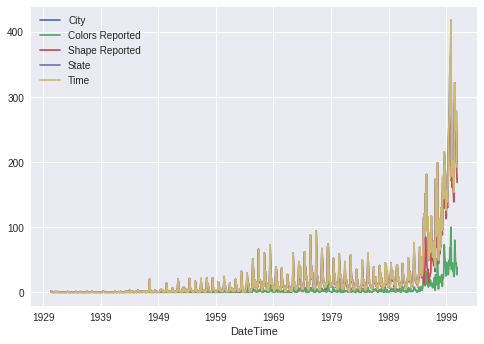

In [0]:
ufo.resample("M").count().plot()

### 　問題

* 未確認飛行物体のデータufoに対して，日付時刻列 DateTime から年を抽出した列　Year を生成せよ．
（ヒント：日付時刻型のから年を計算するには，** dt.year**とすればよい．）

* 未確認飛行物体のデータufoに対して，日付時刻列 DateTime から曜日を抽出した列 WeekDay を生成せよ．
（ヒント：日付時刻型のから曜日を求めるには**dt.weekday**とすればよい．）

* 未確認飛行物体のデータufoに対して，2000年以降のデータだけを抽出せよ．
（ヒント：2000年ちょうどの日付時刻は ** ts = pd.to_datetime('1/1/2000')** で得られる．）

# データフレームの生成法

ここでは，他のPythonオブジェクトからデータフレームやシリーズを生成する方法について述べる．

もっと簡単なのは，辞書から生成する方法である．

辞書のキーが列名：リストとして与えた値が行になる．


In [0]:
D = {'name':['Pikacyu', 'Mickey', 'Kitty'], 'color':['Yellow', 'Black', 'White']}
pd.DataFrame(D)

,color,name
0,Yellow,Pikacyu
1,Black,Mickey
2,White,Kitty


リストのリスト（入れ子のリスト）として与えることもできるが，列名は別途**columns**で与える必要がある．

In [0]:
L = [ ['Pikacyu', 'Yellow'], ['Mickey', 'Black'], ['Kitty', 'White']]
pd.DataFrame(L, columns=['name','color'])

,name,color
0,Pikacyu,Yellow
1,Mickey,Black
2,Kitty,White


NumPyの配列からもデータフレームを生成できる．

例として2つのサイコロを5回づつ振ったときの目をランダムに生成した配列に代入し，そこからデータフレームを生成する．

In [0]:
import numpy as np
Dice = np.random.randint(1,7, size=(5,2)) # 引数の（low, high）はhighを含まないことに注意
dicedf = pd.DataFrame(Dice, columns=[ 'dice1', 'dice2'] )
dicedf

,dice1,dice2
0,3,1
1,3,2
2,1,1
3,3,4
4,2,1


同様に，コインを5回投げたときの表裏を0,1で表した配列を生成する．

In [0]:
Coin = np.random.randint(0,2, size=(5,2)) # 引数の（low, high）はhighを含まないことに注意
coindf = pd.DataFrame(Coin, columns=[ 'coin1', 'coin2'] )
coindf

,coin1,coin2
0,1,0
1,1,1
2,0,0
3,1,1
4,0,0


2つのデータフレームを**concat**を用いて合体させる．列方向で合併したいので，**axis=1**と設定する．

In [0]:
pd.concat( [dicedf, coindf], axis =1 )

,dice1,dice2,coin1,coin2
0,3,1,1,0
1,3,2,1,1
2,1,1,0,0
3,3,4,1,1
4,2,1,0,0


#  ピボットテーブル

ビデオゲームのセールスデータ"http://logopt.com/data/vgsales.csv" をピボットテーブルを用いて集計する．

pandasの**pivot_table**関数は，引数としてデータフレーム，集計する値(values)，行（index），列(columns），集計関数(aggfunc)を与えると，ピボットテーブルを返す．

例としてビデオゲームのデータに対して，行を年('Year')，列をジャンル('Genre')とし，世界中での売り上げ('Global_Sales')を合計（'sum')したピボットテーブルを生成する．

集計の方法は引数**aggfunc**で与える．規定値はNumPyの**mean**（平均）である．


In [0]:
import pandas as pd
sales = pd.read_csv("http://logopt.com/data/vgsales.csv")
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [0]:
pivot = pd.pivot_table(sales, values="Global_Sales",index="Year", columns="Genre", aggfunc="sum")
pivot.head() # ピボットテーブル自身がデータフレームオブジェクトなので，最初の5行だけ表示するにはheadメソッドが使える．

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.34,NaN,0.77,2.71,NaN,NaN,NaN,NaN,7.07,NaN,0.49,NaN
1981.0,14.84,NaN,NaN,NaN,6.93,2.24,0.48,NaN,10.04,0.45,0.79,NaN
1982.0,6.52,NaN,NaN,0.87,5.03,10.03,1.57,NaN,3.79,NaN,1.05,NaN
1983.0,2.86,0.4,NaN,2.14,6.93,0.78,NaN,NaN,0.48,NaN,3.20,NaN
1984.0,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.18,NaN


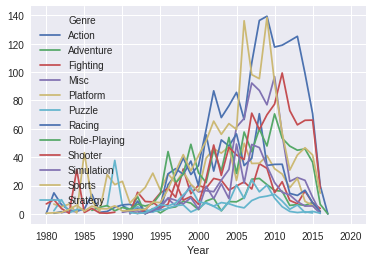

In [0]:
%matplotlib inline
pivot.plot() #ピボットテーブル自身がデータフレームオブジェクトなので，plotメソッドで描画もできる．

In [0]:
#簡単な例
import pandas as pd
df = pd.read_csv("http://logopt.com/data/class.csv")
df

,クラス名,性別,名前,身長,体重
0,猫組,女,ケッタイ,10,6
1,猫組,男,ドラ,130,130
2,猫組,男,ニャンコ,50,12
3,犬組,女,モロ,300,220
4,犬組,男,スヌー,35,10
5,犬組,男,チーズ,30,15
6,犬組,男,パトラッシュ,90,90


In [0]:
df.pivot_table(index="クラス名",columns="性別",values="身長", aggfunc=[sum,max])

sum       max     
性別      女    男    女    男
クラス名                    
犬組    300  155  300   90
猫組     10  180   10  130

### 問題

ポケモンデータ http://logopt.com/data/Pokemon.csv" に対して，メインタイプ（'Type 1')と世代('Generation')別の攻撃力（'Attack'）と守備力（'Defence'）の平均を集計せよ．

（ヒント：pivot_tableで，集計値に複数の値を設定するには，引数**values**にデータフレームの列名をリストとして与える．）


In [0]:
import pandas as pd
poke = pd.read_csv("http://logopt.com/data/Pokemon.csv",index_col=0)
poke.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### 問題

映画のデータ "http://logopt.com/data/movie_metadata.csv" に対して，主演俳優の列（'actor_1_name'）がジョニー・デップ（'Johnny Depp'）のものを抽出し，年度（'title_year'）別の予算（'budget'）と興行収入（'gross'）を線グラフで表示せよ．

ヒント：行には年度を，列には何も指定しないでピボットテーブルを生成し，plotメソッドでグラフを生成する．

In [0]:
import pandas as pd
movie = pd.read_csv("http://logopt.com/data/movie_metadata.csv")
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
